In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pickle

## loading activity dict

In [2]:
file = '../../data/processed/pytorch.pkl'
act = pickle.load(open(file, 'rb'))
len(act)

1827

## making activity signal from dict

In [3]:
from social_phi import get_signal

sig = get_signal(act, time_scale=1, binarize=True)
sig.shape

(1827, 3387)

## temporal phi

In [4]:
from social_phi import phi_for_act_sig

phis, n_users, var = phi_for_act_sig(sig, window=30, var_threshold=0.01, base=np.e, fill_nans=True)
len(phis)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/social_phi/phi.py:12: RuntimeWarning: invalid value encountered in double_scalars
  prod = lambda x: x[0]*x[1]


111

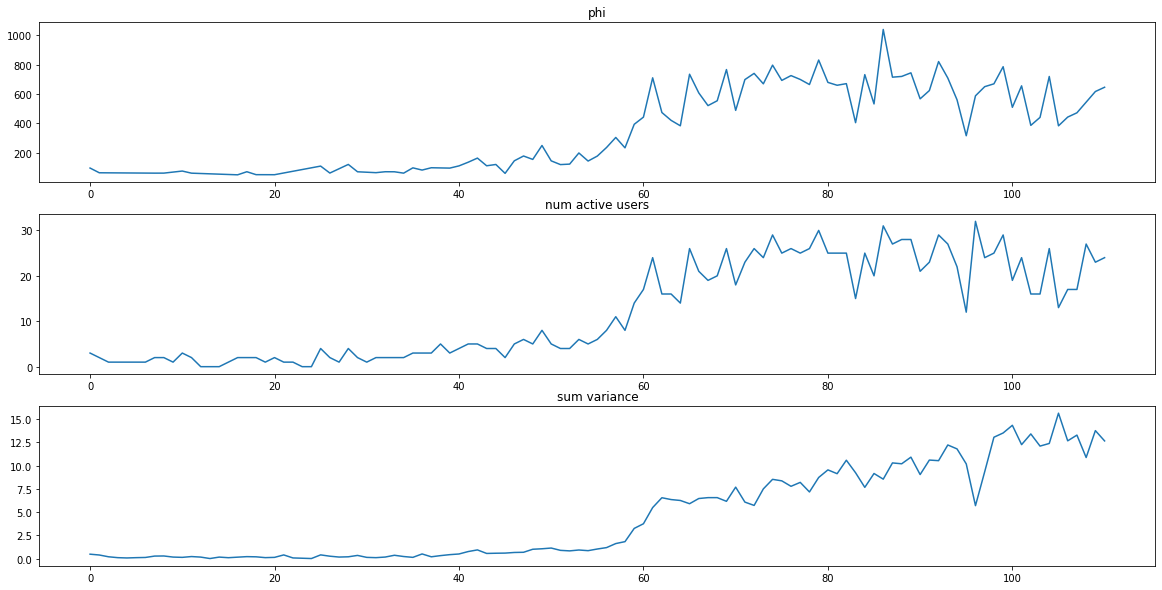

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title('phi')
plt.plot(phis)
plt.subplot(3,1,2)
plt.title('num active users')
plt.plot(n_users)
plt.subplot(3,1,3)
plt.title('sum variance')
plt.plot(var)
plt.show()

In [6]:
print('corr(phi, var)     =',np.corrcoef(phis, var)[0,1])
print('corr(phi, n_users) =',np.corrcoef(phis, n_users)[0,1])

corr(phi, var)     = 0.8416449232272494
corr(phi, n_users) = 0.987445470935819


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


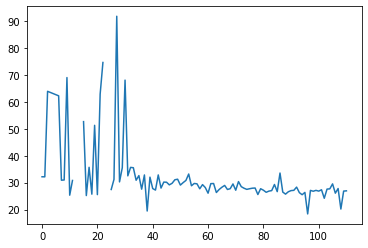

In [7]:
plt.plot(phis/n_users)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


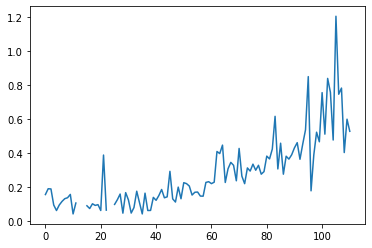

In [8]:
plt.plot(var/n_users)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


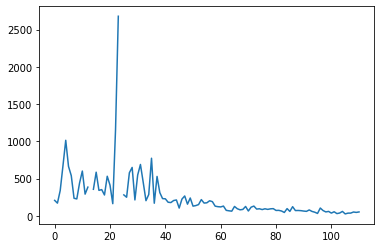

In [9]:
plt.plot(phis/var)
plt.show()